## Введение в PyTorch

In [1]:
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch, torchvision
import torch.nn.functional as F

### 1. Нахождение сложной производной.
Найдите производную по x от функции:

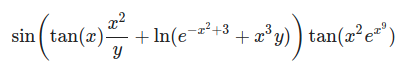

При этом надо пользоваться встроенным в PyTorch autograd.


In [2]:
def find_x_derivative(x, y):

    x = torch.tensor([x], dtype=float, requires_grad=True)
    y = torch.tensor([y], dtype=float, requires_grad=True)
    func = torch.sin(torch.tan(x)*torch.pow(x,2)/y + torch.log(torch.exp(-torch.pow(x,2)+3)+torch.pow(x,3)*y))*torch.tan(torch.pow(x,2)*torch.exp(torch.pow(x,9)))
    func.backward()

    return x.grad

In [3]:
find_x_derivative(1, 7)

tensor([9.5875], dtype=torch.float64)

### 2.	Нахождение косинусной близости
Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.
Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между векторами удобнее всего через скалярное произведение:

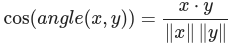

In [4]:
def get_cos_sim(A, B):
    """
        A, B - torch float tensors
    """
    A=torch.tensor(A,dtype = float)
    B=torch.tensor(B, dtype = float)
    B = B.t()

    norm_a = torch.norm(A, dim=1, keepdim=True)
    norm_b = torch.norm(B, dim=1, keepdim=True)

    A = A[:]/norm_a[:]
    B = B[:]/norm_b[:]
    B = B.t()

    return torch.mm(A,B)

In [5]:
A = torch.randn(3, 3)
A.numpy()
A

tensor([[-1.5492, -1.0521, -1.7039],
        [ 0.5240,  1.0613, -2.8905],
        [ 0.7263, -1.3430,  0.1132]])

In [6]:
B = torch.randn(3, 3)
B.numpy()
B

tensor([[-0.7542, -0.4654,  0.3499],
        [ 2.3565, -0.1050, -0.4655],
        [ 0.2752, -2.0804, -0.7958]])

In [7]:
get_cos_sim(A, B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor([[-0.2824,  0.8098,  0.5221],
        [ 0.1685,  0.8487,  0.6459],
        [-0.9659, -0.1324,  0.5228]], dtype=torch.float64)

In [8]:
torch.mean(get_cos_sim(A, B))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor(0.2375, dtype=torch.float64)

### 3.	Обучение своей нейронной сети

Взять датасет Fashion-Mnist, построить свою нейронную сеть cо сверточными слоями и обучить эту нейронную сеть пользуясь материалами из вебинара. 
Архитектура нейронной сети должна быть следующая:
1.	Сначала должны идти два блока в которых должны присутствовать следующие слои:
  
  a)	два подряд идущие сверточных слоя(после каждого сверточного слоя идет активация Relu)
  
  b)	И в конце каждого блока слой макс пулинга
2.	В конце должны идти 3 линейных слоя.
При этом можете поиграться с разными оптимизаторами.
В качестве результата прошу приложить скрин с картинками и предсказанными классами.

In [9]:
train_dataset = torchvision.datasets.FashionMNIST(root='../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [11]:
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

In [12]:
classes = (
    'Tshirt', 'Trouser', 'Pullover', 'Dress','Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot'
    )

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1_1 = nn.Conv2d(1, 8, 3, padding=1)
        self.conv1_2 = nn.Conv2d(8, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2_1 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv2_2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    print(f'{epoch} epoch started!')
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

0 epoch started!
[1,     1] loss: 0.001
[1,   301] loss: 0.124
[1,   601] loss: 0.075
[1,   901] loss: 0.060
1 epoch started!
[2,     1] loss: 0.000
[2,   301] loss: 0.053
[2,   601] loss: 0.051
[2,   901] loss: 0.047
2 epoch started!
[3,     1] loss: 0.000
[3,   301] loss: 0.043
[3,   601] loss: 0.041
[3,   901] loss: 0.041
3 epoch started!
[4,     1] loss: 0.000
[4,   301] loss: 0.037
[4,   601] loss: 0.038
[4,   901] loss: 0.037
4 epoch started!
[5,     1] loss: 0.000
[5,   301] loss: 0.033
[5,   601] loss: 0.034
[5,   901] loss: 0.035
5 epoch started!
[6,     1] loss: 0.000
[6,   301] loss: 0.030
[6,   601] loss: 0.031
[6,   901] loss: 0.030
6 epoch started!
[7,     1] loss: 0.000
[7,   301] loss: 0.027
[7,   601] loss: 0.028
[7,   901] loss: 0.028
7 epoch started!
[8,     1] loss: 0.000
[8,   301] loss: 0.025
[8,   601] loss: 0.025
[8,   901] loss: 0.024
8 epoch started!
[9,     1] loss: 0.000
[9,   301] loss: 0.022
[9,   601] loss: 0.022
[9,   901] loss: 0.023
9 epoch started!
[1

In [14]:
#### Сохранение модели

PATH = './FashionMNIST.pth'
torch.save(net.state_dict(), PATH)

In [15]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1_1.weight  \  torch.Size([8, 1, 3, 3])
conv1_1.bias  \  torch.Size([8])
conv1_2.weight  \  torch.Size([16, 8, 3, 3])
conv1_2.bias  \  torch.Size([16])
conv2_1.weight  \  torch.Size([32, 16, 3, 3])
conv2_1.bias  \  torch.Size([32])
conv2_2.weight  \  torch.Size([64, 32, 3, 3])
conv2_2.bias  \  torch.Size([64])
fc1.weight  \  torch.Size([120, 3136])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


In [16]:
#### Загрузка и использование модели 

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  AnkleBoot Pullover Trouser Trouser


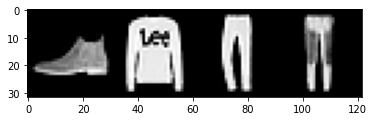

In [18]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
print(outputs)

tensor([[ -7.3016,  -9.3149,  -8.3489, -14.9925, -16.0422,   2.7626, -11.6967,
           1.7374,  -6.5125,  10.6528],
        [ -1.1857, -14.3291,   8.7647,  -8.9912,  -1.1941, -12.6429,  -1.6794,
         -10.7704,  -4.5004, -13.2654],
        [ -7.4479,  23.4647, -11.7886,  -6.1087, -13.3379, -18.8265,  -7.2789,
         -24.1471, -15.7838, -18.2753],
        [ -7.2179,  22.6754, -11.6458,  -6.5777, -11.3666, -17.7686,  -6.8439,
         -24.2386, -14.7746, -16.9142]], grad_fn=<AddmmBackward>)


In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  AnkleBoot Pullover Trouser Trouser
